In [57]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plots
plots.style.use('fivethirtyeight')

import matplotlib.pylab as plt
%matplotlib inline

from scipy import special

from scipy import stats

# Exam 2 Review Notebook

# I). Hypothesis Tests:  Recap from Juptyer Notebook Lecture 21


---

## Super Soda Co and the Case of Bad Taste

Manufacturers of Super Soda run a taste test and 91 out of 200 tasters prefer Super Soda over its rival.  The boss is upset!  He asks:

    Do fewer people prefer Super Soda than its rival, or is this just chance?
    
You run a hypothesis test:

* **Null Hypothesis:** Equal proportions of the population prefer Super Soda as Rival and any variability is due to chance.
* **Alternative Hypothesis:** Fewer people in the population prefer Super Soda than its Rival.
* **Test Statistic:** Number of people who prefer Super Soda  (Note:  could also use proportion of people who prefer Super Soda, or difference between number of people who prefer Super Soda and 100)


You pick a **significance level (i.e. p-value cutoff) of 0.05**

### Null Hypothesis Distribution:
What probability distribution models our null hypothesis?  Plot a histogram of this distribution AND a red dot with the observed test statistic.


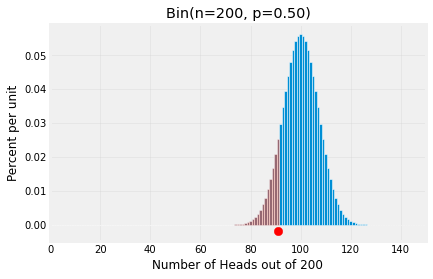

In [50]:
# We can model the number of people who prefer Super Soda out of 200 using a binomial distribution.
# Caveat:  Binomial distribution assumes we're sampling with replacement (it assumes independent Bernoulli trials)
# though we're not taking our sample with replacement, our sample is small
# compared to the total population (sample <10% of population size), so probabilities using replacement
# vs not will be basically the same.  
# Our null is that it's 50/50 (i.e. 50% of people like Super Soda)

n=200
k = np.arange(n+1)
#Probability for a binomial distribution with p=0.50
p = special.comb(n, k)*(0.50**k)*(0.50**(n-k))

fig, ax = plt.subplots()

ax.bar(k, p, width=1, ec='white');
ax.set_axisbelow(True)
ax.grid(alpha=0.25)
plt.xlim(0,int(n*3/4))
plt.title("Bin(n="+str(n)+", p=0.50)");
plt.xlabel("Number of Heads out of "+str(n))
plt.ylabel("Percent per unit")


obs_stat=91

#Add a dot for the observed statistic
plt.scatter(obs_stat, -0.002, color='red', s=70);
#Shade in the p-value   
ax.bar(np.arange(n+1)[np.arange(n+1)<=obs_stat], p[np.arange(n+1)<=obs_stat], width=1, ec='white',alpha=0.6);



### Theoretical P-Value

In [51]:
#Since we have the theoretical probability distribution,
#the p-value is just the sum of the probabilities for X<=91
actual_p_val = sum(p[np.arange(n+1)<=obs_stat])

actual_p_val


0.11462329862986695

## Conclusion of Test:

Since 0.11>0.05, we **fail to reject** the null hypothesis that equal proportions of the population prefer Super Soda as Rival and any variability is due to chance.


---

## Empirical P-Value:  The Importance of Number of Simulations.

What if we didn't know the theoretical distribution?  How does the theoretical p-value compare to simulated p-values?  Suppose we're simulating the null hypothesis (instead of using the actual theoretical distribution).  Let's examine how the number of simulations we use affects how accurate our empirical p-value estimate is.


In [52]:
#Simulate the number of heads when randomly flipping a fair coin 200 times

def simulate_one_count(sample_size):
    return np.count_nonzero(np.random.choice(['H', 'T'], sample_size) == 'H')
simulate_one_count(200)

101

## Changing the number of simulations

In [53]:
# Keeping the observed test statistic fixed, 
# we can re-run the test with a new simulation under the null

def run_test(num_simulations, sample_size):
    counts=np.array([simulate_one_count(sample_size) for i in range(num_simulations)])
    return counts

counts = run_test(10000, 200)
print("Actual (theoretical) p-value: ", actual_p_val)
print("Empirical (simulated) p-value using 10000 simulations: ", np.count_nonzero(counts <= 91)/len(counts))



Actual (theoretical) p-value:  0.11462329862986695
Empirical (simulated) p-value using 10000 simulations:  0.1159


In [70]:
# Let's see how the empirical p-value varies with the
# number of siulations:  
tests = pd.DataFrame(columns=['simulations', 'empirical p-value for 91'])
    
for num_sims in [100, 1000, 10000, 50000]:
    for k in np.arange(50):
        counts = run_test(num_sims, 200)
        tests.loc[len(tests.index)] = [num_sims, np.count_nonzero(counts <= 91)/len(counts)] 
 
tests



,simulations,empirical p-value for 91
0,100.0,0.10000
1,100.0,0.10000
2,100.0,0.08000
3,100.0,0.11000
4,100.0,0.13000
...,...,...
195,50000.0,0.11310
196,50000.0,0.11612
197,50000.0,0.11266
198,50000.0,0.11398


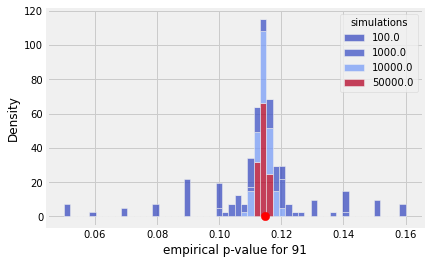

In [71]:
# For larger numbers of simulations, p-values are more consistent
# Since a large number of simulations provides a good estimate of the
# theoretical distribution of the test statistic under the null hypothesis:


sns.histplot(data=tests, x="empirical p-value for 91", hue="simulations", palette =sns.color_palette("coolwarm", as_cmap=True),  multiple="stack",stat="density")
plt.scatter(actual_p_val, -0.002, color='red', s=70, label = 'actual theoretical p-value');

## Analyzing Power of Test:


### Definition:  The Power of a hypothesis test is the probability of correctly rejecting the null hypothesis when the alternative hypothesis is true.

**Convention: We usually try to design hypothesis tests so that the power is at least 80%.**  
Power is affected by 
 - Significance level (p-value cutoff)
 - Sample size
 - Effect size
 
Let's experiment with how these 3 factors can affect the power of the test: 

Suppose in reality the true proportion of people who prefer Super Soda is 45% (i.e. your null hypothesis is actually wrong).

You don't know this, so your null hypothesis remains the same.  Let's look at how often we correctly reject the null in this case.

* **Null Hypothesis:** Equal proportions of the population prefer Super Soda as Rival and any variability is due to chance.
* **Alternative Hypothesis:** Fewer people in the population prefer Super Soda than its Rival.
* **Test Statistic:** Number of people who prefer Super Soda


In [73]:
# Suppose that the true proportion of people who prefer Super Soda is 45%
true_proportion = 0.45
true_distribution = [true_proportion, 1 - true_proportion]
true_distribution

[0.45, 0.55]

In [74]:
# Taste tests with 200 people will give various numbers of people who prefer Super Soda
sample_size = 200

np.random.binomial(sample_size, true_distribution).item(0)


91

In [75]:
 
# Suppose in the actual population, 45% of people like Super Soda
# Let's run a taste test for 200 people, 
# and calculate the p-value:

def run_experiment(num_simulations, sample_size, true_proportion):
    # Collect data
    true_distribution = [true_proportion, 1 - true_proportion]
    taste_test_results = np.random.binomial(sample_size, true_distribution)
    observed_stat_from_this_sample = taste_test_results.item(0)
    
    # Conduct hypothesis test
    counts = run_test(num_simulations, sample_size)
    p_value = np.count_nonzero(counts <= observed_stat_from_this_sample) / len(counts)
    return p_value

("P-value from one experiment:", run_experiment(10000, 200, 0.45))

('P-value from one experiment:', 0.6908)

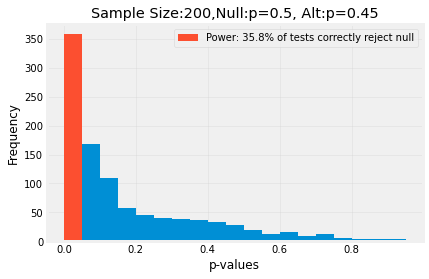

In [81]:
# Let's imagine running our taste test over and over again to see how often 
# we correctly reject the null:

true_proportion = 0.45
sample_size = 200

p_values=np.array([run_experiment(10000,sample_size,true_proportion) for i in range(1000)])

fig, ax = plt.subplots()
 
ax.hist(p_values,bins=np.arange(0,1, .05));
ax.hist(p_values[p_values<=0.05],bins=1,label="Power: "+str(100*np.mean(p_values <= 0.05))+"% of tests correctly reject null")
ax.set_axisbelow(True)
ax.grid(alpha=0.25)
plt.title("Sample Size:"+str(sample_size)+",Null:p=0.5, Alt:p="+str(true_proportion));
plt.xlabel("p-values")
plt.ylabel("Frequency")
plt.legend()



### Determining Sample Size for Power of 80%:
#### If the true proportion of people who like Super Soda is 0.45, what Sample Size do we need to use to correctly reject our null hypothesis (that the proportion is 0.5) at least 80% of the time?  (i.e. what sample size do we need to get a Power of at least 80%)?

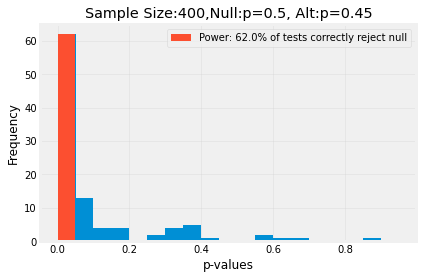

In [79]:
true_proportion = 0.45

sample_size = 400

p_values=np.array([run_experiment(10000,sample_size,true_proportion) for i in range(1000)])

fig, ax = plt.subplots()
 
ax.hist(p_values,bins=np.arange(0,1, .05));
ax.hist(p_values[p_values<=0.05],bins=1,label="Power: "+str(100*np.mean(p_values <= 0.05))+"% of tests correctly reject null")
ax.set_axisbelow(True)
ax.grid(alpha=0.25)
plt.title("Sample Size:"+str(sample_size)+",Null:p=0.5, Alt:p="+str(true_proportion));
plt.xlabel("p-values")
plt.ylabel("Frequency")
plt.legend()



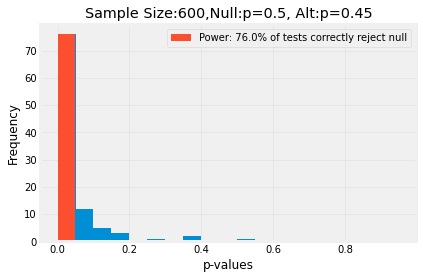

In [80]:
true_proportion = 0.45

sample_size = 600

p_values=np.array([run_experiment(10000,sample_size,true_proportion) for i in range(1000)])

fig, ax = plt.subplots()
 
ax.hist(p_values,bins=np.arange(0,1, .05));
ax.hist(p_values[p_values<=0.05],bins=1,label="Power: "+str(100*np.mean(p_values <= 0.05))+"% of tests correctly reject null")
ax.set_axisbelow(True)
ax.grid(alpha=0.25)
plt.title("Sample Size:"+str(sample_size)+",Null:p=0.5, Alt:p="+str(true_proportion));
plt.xlabel("p-values")
plt.ylabel("Frequency")
plt.legend()


### Effect Size:
**Effect Size**:  The difference between the true proportion and the null hypothesis proportion.
#### Experiment with different effect sizes.  How does the power of the test change as you change the effect size ?

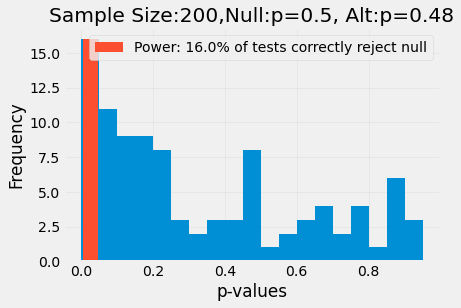

In [78]:
true_proportion = .48
sample_size = 200

p_values=np.array([run_experiment(1000,sample_size,true_proportion) for i in range(100)])

fig, ax = plt.subplots()
 
ax.hist(p_values,bins=np.arange(0,1, .05));
ax.hist(p_values[p_values<=0.05],bins=1,label="Power: "+str(100*np.mean(p_values <= 0.05))+"% of tests correctly reject null")
ax.set_axisbelow(True)
ax.grid(alpha=0.25)
plt.title("Sample Size:"+str(sample_size)+",Null:p=0.5, Alt:p="+str(true_proportion));
plt.xlabel("p-values")
plt.ylabel("Frequency")
plt.legend()



Making the effect size larger and keeping the same sample size the same (200) leads to a larger power of the test (we're more likely to be able to correctly reject the null). 
Similarly, if we decrease the effect size, we will need a larger sample size to keep the same level of power. 

## Hypothesis Testing Ex: The TA's Defense ##

In [17]:
scores = pd.read_csv('scores_by_section.csv')
scores

,Section,Midterm
0,1,22
1,2,12
2,2,23
3,2,14
4,1,20
...,...,...
354,5,24
355,2,16
356,2,17
357,12,16


In [18]:
scores.groupby("Section").count()

,Midterm
Section,
1,32
2,32
3,27
4,30
5,33
6,32
7,24
8,29
9,30


In [19]:
scores.groupby("Section").agg({"Midterm":["count", "mean"]}).rename(columns={"count":"student count"})

Midterm           
        student count       mean
Section                         
1                  32  15.593750
2                  32  15.125000
3                  27  13.666667
4                  30  14.766667
5                  33  17.454545
6                  32  15.031250
7                  24  16.625000
8                  29  16.310345
9                  30  14.566667
10                 34  15.235294
11                 26  15.807692
12                 30  15.733333

In [9]:
observed_test_stat = 13.6667 

In [10]:
scores["Midterm"].mean()

15.493036211699165

In [20]:
# Simulate one value of the test statistic 
# under the hypothesis that the section is like a random sample from the class

def random_sample_midterm_avg():
    random_sample = scores.sample(27, replace=True)
    return random_sample['Midterm'].mean()

In [33]:
# Simulate 10,000 copies of the test statistic


num_sim=10000

sample_averages = np.array([random_sample_midterm_avg() for i in range(num_sim)])




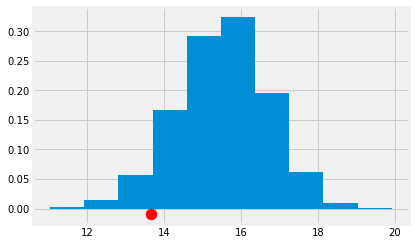

In [34]:
# Compare the simulated distribution of the statistic
# and the actual observed statistic

plt.hist(sample_averages, density=True);

plots.scatter(observed_test_stat, -0.01, color='red', s=120);

## Calculating empirical p-value

In [35]:
# (1) Calculate the p-value: simulation area beyond observed value
sum(sample_averages <= observed_average) / num_sim
# (2) See if this is less than your predetermined significance level. 

0.065

## Conclusion:  
...

## Approximate Calculation For Previous Ex Using CLT:

Notice in the simulated sample mean distribution above the distribution looks very close to a normal distribution.   

For the CLT to apply we look for $n \geq 30$, however we can see from our simulation above that the distribution looks approximately normal for $n=27$, so we can use the CLT in this case.

Since we are looking at a sample of 27 students out of a population of 358 students (i.e. our sample is less than 10% of our population size), we can treat our random sample without replacement as if it were a random sample with replacement (the probabilities will be very close).  


Thus, by the Central Limit Theorem, the sample mean is normally distributed.  In particular:

By the CLT, $$\bar{X}_{27} \sim N(\mu, \sigma^2/27)$$ where $\mu = $ pop mean = `scores["Midterm"].mean()`   and                    

$\sigma = $ pop_std = `np.std(pop_std=scores["Midterm"])`


Thus 

p-value =   $P(\bar{X}_{27}<=13.667)$ = `stats.norm.cdf(13.667,pop_mean, pop_std/np.sqrt(27))`


In [26]:
pop_mean=scores["Midterm"].mean()

In [24]:
pop_std=np.std(scores["Midterm"])

In [27]:
stats.norm.cdf(13.667,pop_mean, pop_std/np.sqrt(27))

0.059094075271088536

Again, since $p= 0.059> 0.01$, we **FAIL TO REJECT** the null hypothesis that any difference in scores for section 3 was just due to random chance

## Review: Alameda County Jury Panels ##

In [8]:
eth =['Asian', 'Black', 'Latino', 'White', 'Other']

jury = pd.DataFrame(
    {       
        'Eligible': [0.15, 0.18, 0.12, 0.54, 0.01],
         'Panels': [0.26, 0.08, 0.08, 0.54, 0.04]
        
    }, index = eth
)

jury

,Eligible,Panels
Asian,0.15,0.26
Black,0.18,0.08
Latino,0.12,0.08
White,0.54,0.54
Other,0.01,0.04


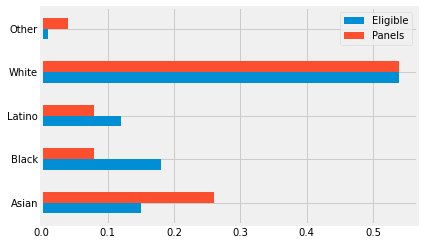

In [3]:
jury.plot.barh();

In [9]:
#Make an array with the eligible proportions assumed under the null hypothesis

null_hyp=np.array([0.15, 0.18, 0.12, 0.54, 0.01])

In [10]:
# Simulate a draw of size N assuming the null hypothesis:


N=1423  #from the ACLU report
simulated = np.random.multinomial(N, null_hyp)

simulated_proportions = simulated/N

print(simulated)
print(simulated_proportions)

[192 259 169 791  12]
[0.13492621 0.18200984 0.11876318 0.55586788 0.00843289]


        Eligible  Panels  Simulated
Asian       0.15    0.26   0.134926
Black       0.18    0.08   0.182010
Latino      0.12    0.08   0.118763
White       0.54    0.54   0.555868
Other       0.01    0.04   0.008433


<AxesSubplot:>

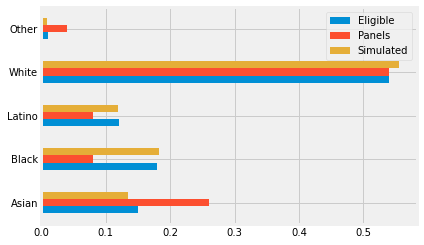

In [11]:
# The actual observed distribution (Panels) looks quite different
# from the simulation -- try running this several times to confirm!
jury_with_simulated=jury.copy()
jury_with_simulated["Simulated"]=simulated_proportions

print(jury_with_simulated)

jury_with_simulated.plot.barh()

## Distance Between Distributions

In [12]:

# In this case, we need to understand how each of the 5 categories
# differ from their expected values according to the model

jury_with_difference=jury.copy()
jury_with_difference["Difference"]=jury["Panels"]-jury["Eligible"]
jury_with_difference

,Eligible,Panels,Difference
Asian,0.15,0.26,0.11
Black,0.18,0.08,-0.10
Latino,0.12,0.08,-0.04
White,0.54,0.54,0.00
Other,0.01,0.04,0.03


## Total Variation Distance

In [13]:
# This was the statistic we chose
def tvd(dist1, dist2):
    return sum(abs(dist1 - dist2))/2

In [10]:
np.mean(jury['Panels']-null_hyp)/2

2.7755575615628915e-18

In [14]:
# The TVD of our observed data (Panels) from their expected values
# assuming the model is true 
obsvd_tvd = tvd(jury['Panels'],null_hyp)
obsvd_tvd

0.14

In [15]:
# The TVD of a model simluation from its expected values
tvd(np.random.multinomial(N, null_hyp)/N, null_hyp)

0.01022487702037951

Text(0, 0.5, 'Percent per unit')

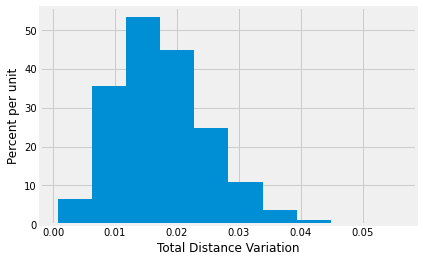

In [16]:
def simulated_tvd():
    return tvd(np.random.multinomial(N, null_hyp)/N, null_hyp)


num_simulations = 50000

tvds = np.array([simulated_tvd() for i in range(num_simulations)])


plt.hist(tvds, density=True);  
plt.xlabel("Total Distance Variation")
plt.ylabel("Percent per unit")
    

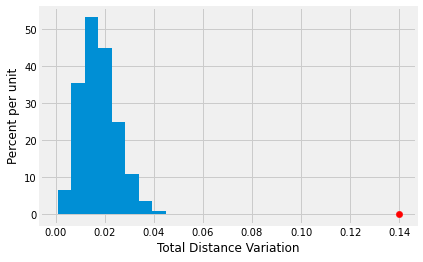

In [17]:
# Add the observed test statistic to the plot:
plt.hist(tvds, density=True);  
plt.xlabel("Total Distance Variation")
plt.ylabel("Percent per unit")

    
plt.scatter(obsvd_tvd, -.001, color="red", s=40)




In [18]:

# (1) Calculate the empirical p-value: simulation area beyond observed value

sum(tvds>=obsvd_tvd)/N

# (2) See if this is less than 1% (or our initially chosen significance level)

0.0

**Conclusion**:
Our empiricial p-value is $0$ (note that the actual theoretical p-value isn't 0, but since our simulations showed 0 observations out of $10000$ that had a TVD greater than or equal to 0.14, we know that the theoretical p-value is at least less than $1/10000$.

Given that our empirical p-value is less than our significance cutoff of $0.01$ we **REJECT THE NULL** hypothesis.      It is important for us to be precise about what we can conclude from our analysis:

**We can conclude that the distribution provided for the panelists who reported for service does not look like a random sample from the estimated distribution in the eligible population.**

Our analysis supports the ACLU’s conclusion that the panels were not representative of the distribution provided for the eligible jurors.

As with most such analyses, ours doesn’t say why the distributions are different.   See here for a more detailed discussion about this case:  https://inferentialthinking.com/chapters/11/2/Multiple_Categories.html